## 2. Linear Regression

In [5]:
# Establish the Working Directory
import os

# Print current working directory before change
os.getcwd()

'C:\\Users\\datam'

In [6]:
# Change the Directory
os.chdir("C:\\Users\\datam\\OneDrive\\Desktop\\python") # change as needed

# Verify the change
os.getcwd()

'C:\\Users\\datam\\OneDrive\\Desktop\\python'

In [6]:
# vtreat and pyearth would not work despite multiple fixes. vtreat requires y-aware methods, which will become Ames 2.1 notebook

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.metrics import mean_squared_error, r2_score
#import vtreat
#import vtreat.cross_plan

In [8]:
# Set decimal formatting globally
pd.set_option('display.float_format', '{:.3f}'.format)  # 3 decimal places for pandas
np.set_printoptions(precision=3)  # 3 decimal places for numpy

In [19]:
# Anscombe's Quartet ------------------------------------------------------
# Loading Anscombe's dataset (available in seaborn)
anscombe = sns.load_dataset('anscombe')
anscombe.head()

,dataset,x,y
0,I,10.000,8.040
1,I,8.000,6.950
2,I,13.000,7.580
3,I,9.000,8.810
4,I,11.000,8.330


In [22]:
# Correlations
corr_x1_y1 = np.corrcoef(anscombe[anscombe['dataset'] == 'I']['x'], 
                          anscombe[anscombe['dataset'] == 'I']['y'])[0,1]
print(f"Correlation x1, y1: {corr_x1_y1:.3f}")

Correlation x1, y1: 0.816


In [24]:
corr_x2_y2 = np.corrcoef(anscombe[anscombe['dataset'] == 'II']['x'], 
                          anscombe[anscombe['dataset'] == 'II']['y'])[0,1]
f"Correlation x1, y1: {corr_x1_y1:.3f}"

'Correlation x1, y1: 0.816'

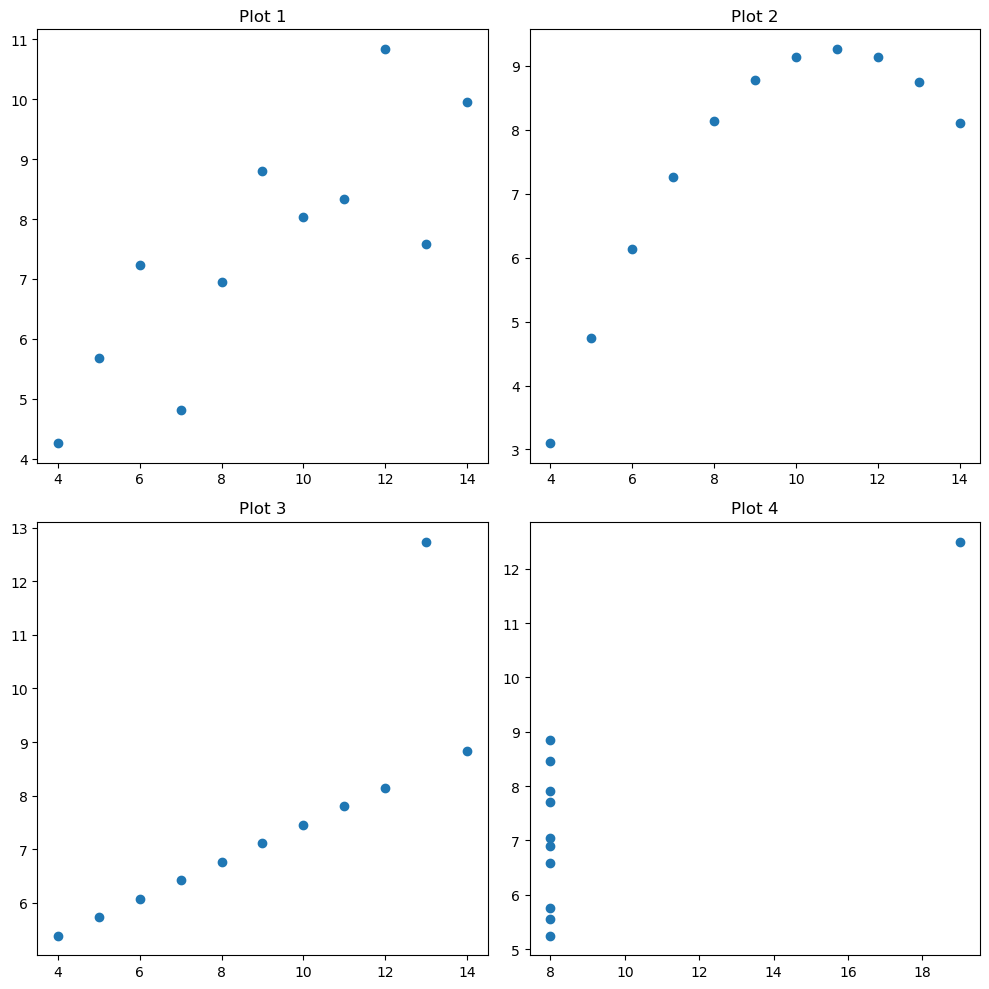

In [25]:
# 2x2 plot grid
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
for i, dataset in enumerate(['I', 'II', 'III', 'IV']):
    data = anscombe[anscombe['dataset'] == dataset]
    axs[i//2, i%2].scatter(data['x'], data['y'])
    axs[i//2, i%2].set_title(f'Plot {i+1}')
plt.tight_layout()
plt.show()

### Snake River Dataset

In [27]:
snake = pd.read_csv('snake.csv')  # Adjust path as needed
snake.shape

(17, 2)

In [29]:
snake.head()

,X,Y
0,23.100,10.500
1,32.800,16.700
2,31.800,18.200
3,32.000,17.000
4,30.400,16.300


In [31]:
snake.columns = ['content', 'yield']

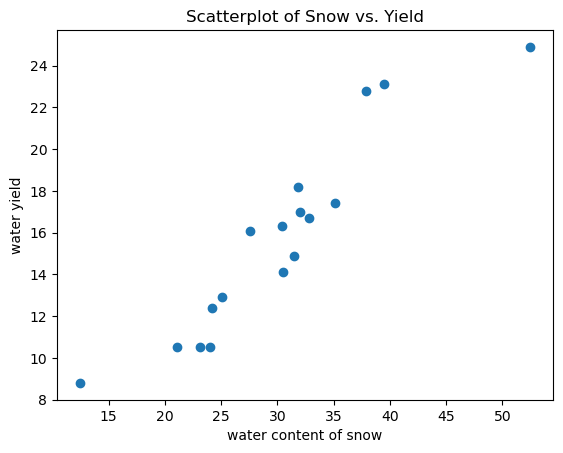

In [32]:
# Scatter plot
plt.scatter(snake['content'], snake['yield'])
plt.title('Scatterplot of Snow vs. Yield')
plt.xlabel('water content of snow')
plt.ylabel('water yield')
plt.show()

In [33]:
# Linear regression using Statsmodels
X = sm.add_constant(snake['content'])
yield_fit = sm.OLS(snake['yield'], X).fit()
yield_fit.summary()

C:\Users\datam\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  yield   R-squared:                       0.871
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     101.2
Date:                Sat, 08 Mar 2025   Prob (F-statistic):           4.63e-08
Time:                        09:01:39   Log-Likelihood:                -32.501
No. Observations:                  17   AIC:                             69.00
Df Residuals:                      15   BIC:                             70.67
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7254      1.549      0.468      0.646      -2.576       4.027
content        0.4981      0.050     10.058      0.000       0.393       0.604
==============================================================================
Omnibus:                        1.700   Durbin-Watson:                   2.706
Prob(Omnibus):                  0.427   Jarque-Bera (JB):                1.256
Skew:                           0.459   Prob(JB):                        0.534
Kurtosis:                       2.036   Cond. No.                         115.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

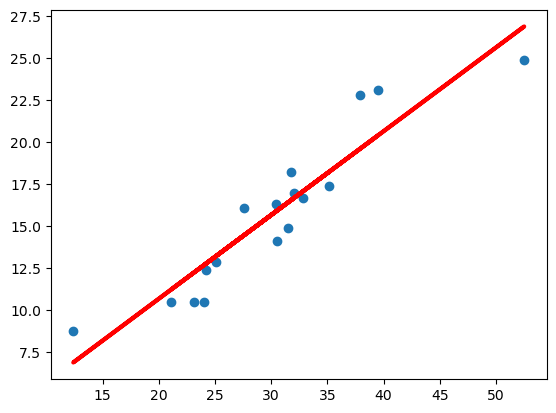

In [35]:
# Plot with regression line
plt.scatter(snake['content'],(snake['yield']))
plt.plot(snake['content'], yield_fit.predict(X), color='red', linewidth=3)
plt.show()

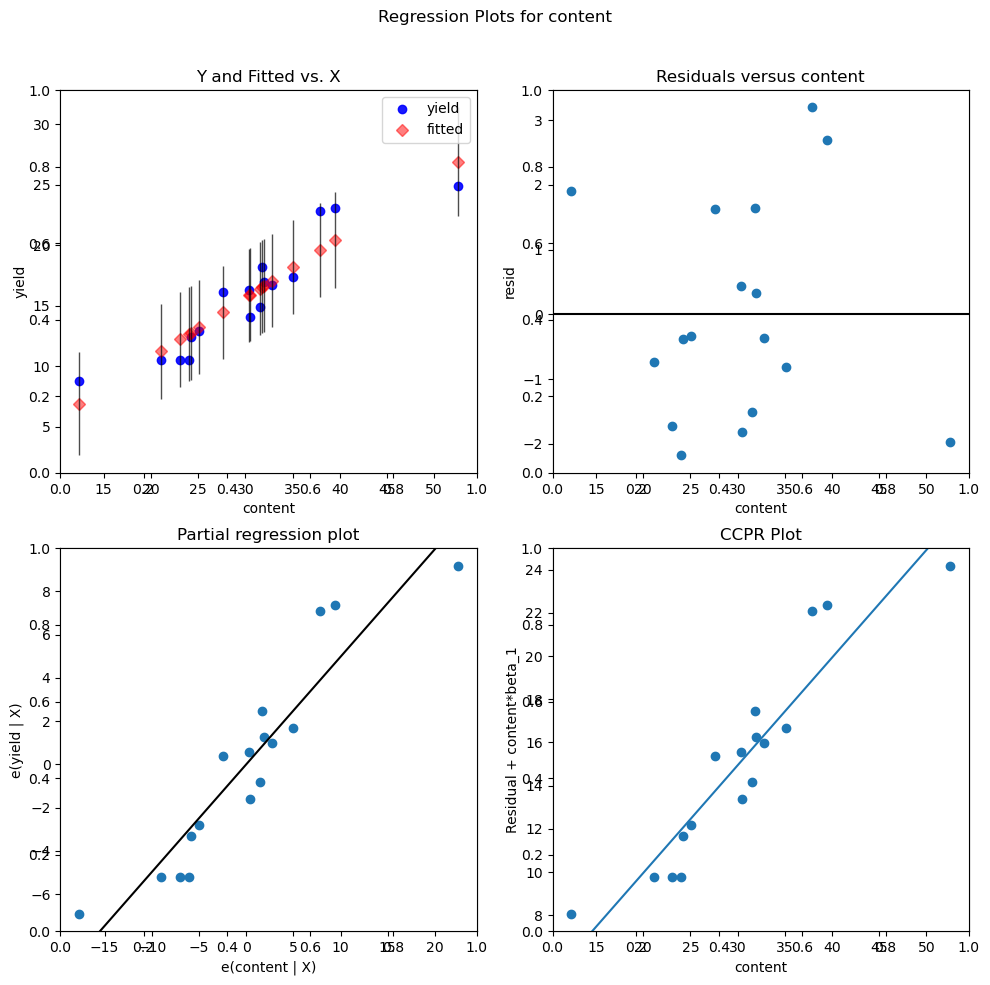

In [36]:
# Diagnostic plots
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
sm.graphics.plot_regress_exog(yield_fit, 'content', fig=fig)
plt.show()

### Ames, Iowa Dataset - Multivariate Regression

In [9]:
ames = pd.read_csv("ames.csv")
ames.shape

(1460, 81)

In [10]:
# Duplicates
ames.duplicated().value_counts()

False    1460
Name: count, dtype: int64

In [11]:
# Descriptive stats
ames_descr = ames.describe()
ames_descr

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000,1460.000,1201.000,1460.000,1460.000,1460.000,1460.000,1460.000,1452.000,1460.000,...,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000
mean,730.500,56.897,70.050,10516.828,6.099,5.575,1971.268,1984.866,103.685,443.640,...,94.245,46.660,21.954,3.410,15.061,2.759,43.489,6.322,2007.816,180921.196
std,421.610,42.301,24.285,9981.265,1.383,1.113,30.203,20.645,181.066,456.098,...,125.339,66.256,61.119,29.317,55.757,40.177,496.123,2.704,1.328,79442.503
min,1.000,20.000,21.000,1300.000,1.000,1.000,1872.000,1950.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,2006.000,34900.000
25%,365.750,20.000,59.000,7553.500,5.000,5.000,1954.000,1967.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,5.000,2007.000,129975.000
50%,730.500,50.000,69.000,9478.500,6.000,5.000,1973.000,1994.000,0.000,383.500,...,0.000,25.000,0.000,0.000,0.000,0.000,0.000,6.000,2008.000,163000.000
75%,1095.250,70.000,80.000,11601.500,7.000,6.000,2000.000,2004.000,166.000,712.250,...,168.000,68.000,0.000,0.000,0.000,0.000,0.000,8.000,2009.000,214000.000
max,1460.000,190.000,313.000,215245.000,10.000,9.000,2010.000,2010.000,1600.000,5644.000,...,857.000,547.000,552.000,508.000,480.000,738.000,15500.000,12.000,2010.000,755000.000


In [12]:
# Feature engineering
ames = ames.drop(columns=['Id'])
ames['yearsOld'] = 2011 - ames['YearBuilt']
ames['yearsRemodel'] = 2011 - ames['YearRemodAdd']
ames['yearsGarage'] = 2011 - ames['GarageYrBlt']
ames.loc[:, 'yearsGarage_isNA'] = np.where(ames['yearsGarage'].isna(), 1, 0)
ames.loc[:, 'yearsGarage'] = ames['yearsGarage'].fillna(0)
ames['MoSold'] = ames['MoSold'].astype(str)
ames = ames.drop(columns=ames.columns[[18, 19, 58]])  # Adjusted for 0-based indexing
ames.shape

(1460, 81)

In [13]:
# Find indices of NA in 'SalePrice' column
ames[ames['SalePrice'].isna()].index

Index([], dtype='int64')

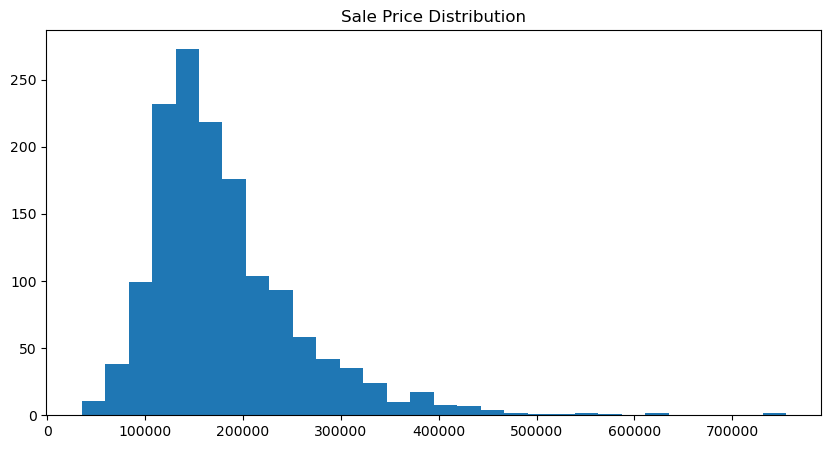

In [14]:
# Histogram of the outcome
plt.figure(figsize=(10, 5))
plt.hist(ames['SalePrice'], bins=30)
plt.title('Sale Price Distribution')
plt.show()

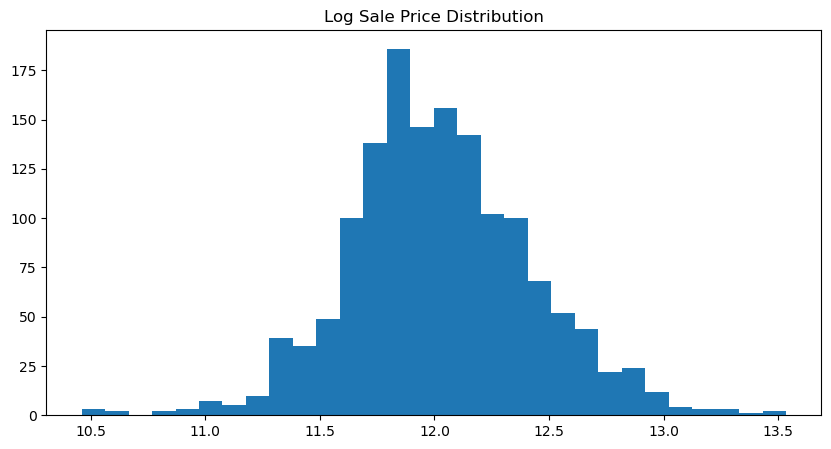

In [15]:
# log sales
ames['logSales'] = np.log(ames['SalePrice'])
plt.figure(figsize=(10, 5))
plt.hist(ames['logSales'], bins=30)
plt.title('Log Sale Price Distribution')
plt.show()

In [16]:
# Handle missing values; You could do this in vtreat, but is another example
ames.loc[:, 'LotFrontage_isNA'] = np.where(ames['LotFrontage'].isna(), 1, 0)
ames.loc[:, 'LotFrontage'] = ames['LotFrontage'].fillna(0)
ames.loc[:, 'MasVnrArea_isNA'] = np.where(ames['MasVnrArea'].isna(), 1, 0)
ames.loc[:, 'MasVnrArea'] = ames['MasVnrArea'].fillna(0)

In [17]:
# Low or no variance (unchanged from original)
from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold(threshold=0)
numeric_cols = ames.select_dtypes(include=['int64', 'float64']).columns
selector.fit(ames[numeric_cols])
feature_variance = pd.DataFrame({
    'feature': numeric_cols,
    'zeroVar': ~selector.get_support()
})
feature_variance['zeroVar'].value_counts()

zeroVar
False    37
Name: count, dtype: int64

In [18]:
# Train-test split
#np.random.seed(1944)
train, test = train_test_split(ames, train_size=0.8, random_state=1944)
train_y, train_logy = train['SalePrice'], train['logSales']
test_y, test_logy = test['SalePrice'], test['logSales']

In [19]:
# Prepare features (exclude targets)
features = [col for col in train.columns if col not in ['SalePrice', 'logSales']]
categorical_cols = train[features].select_dtypes(include=['object']).columns
numerical_cols = train[features].select_dtypes(include=['int64', 'float64']).columns
numerical_cols

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'YrSold', 'yearsOld', 'yearsRemodel', 'yearsGarage'],
      dtype='object')

In [22]:
# # Encode categorical variables
X_train_cat = pd.get_dummies(train[categorical_cols], columns=categorical_cols, dummy_na=True, drop_first=True, dtype=int)
X_test_cat = pd.get_dummies(test[categorical_cols], columns=categorical_cols, dummy_na=True, drop_first=True, dtype=int)

In [23]:
# Combine numerical and encoded categorical features
X_train = pd.concat([train[numerical_cols], X_train_cat], axis=1)
X_test = pd.concat([test[numerical_cols], X_test_cat], axis=1)
X_train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,SaleType_New,SaleType_Oth,SaleType_WD,SaleType_nan,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SaleCondition_nan
1153,30,0.000,5890,6,8,0.000,538,0,278,816,...,0,0,1,0,0,0,0,1,0,0
742,20,65.000,8450,7,5,108.000,0,0,1349,1349,...,0,0,1,0,0,0,0,1,0,0
1192,50,60.000,9600,5,8,0.000,0,0,702,702,...,0,0,1,0,0,0,0,1,0,0
761,30,60.000,6911,5,5,0.000,405,0,740,1145,...,0,0,1,0,0,0,0,1,0,0
41,20,115.000,16905,5,6,0.000,967,0,383,1350,...,0,0,1,0,0,0,0,1,0,0


### Need to add this in the next iteration

In [78]:
# Correlation and high correlation removal
df_corr = trained.corr().abs()  # Use absolute values
threshold = 0.79  # Your cutoff

# Initialize list of columns to remove
to_remove = set()

# Get upper triangle of correlation matrix (excluding diagonal)
upper = df_corr.where(np.triu(np.ones(df_corr.shape), k=1).astype(bool))

# Iterate through columns to find high correlations
for col in upper.columns:
    if col not in to_remove:  # Skip if already marked for removal
        # Find columns highly correlated with this one
        high_corr_cols = upper.index[upper[col] > threshold].tolist()
        # Add only those not yet marked for removal
        for corr_col in high_corr_cols:
            if corr_col not in to_remove:
                to_remove.add(corr_col)  # Add one of the pair to remove
                break  # Remove only one per pair, then move to next column

# Convert to list for dropping
to_remove = list(to_remove)
print(f"Number of columns to remove: {len(to_remove)}")
print(f"Columns being removed: {to_remove}")

# Remove the identified columns
trained = trained.drop(columns=to_remove)

Number of columns to remove: 57
Columns being removed: ['Exterior2nd_lev_CBlock', 'LandSlope_lev_Gtl', 'BsmtQual_lev__NA_', 'Exterior2nd_lev_MetalSd', 'GarageCond_isNA', 'CentralAir_lev_Y', 'PoolArea', 'BsmtCond_isNA', 'BsmtFinType2_lev__NA_', '1stFlrSF', 'Exterior2nd_lev_Wd_Sdng', 'MSZoning_lev_FV', 'BsmtExposure_isNA', 'BsmtFinType1_isNA', 'MiscVal', 'GarageCars', 'BsmtQual_isNA', 'TotRmsAbvGrd', '2ndFlrSF', 'MasVnrType_isNA', 'PavedDrive_lev_Y', 'MiscFeature_lev__NA_', 'BsmtFinType2_isNA', 'GarageQual_isNA', 'Exterior2nd_lev_AsphShn', 'PoolQC_isNA', 'yearsGarage_isNA', 'RoofStyle_lev_Gable', 'MiscFeature_isNA', 'LotShape_lev_Reg', 'GarageType_lev__NA_', 'FireplaceQu_isNA', 'Electrical_lev_SBrkr', 'Exterior2nd_lev_VinylSd', 'SaleCondition_lev_Partial', 'BsmtCond_lev__NA_', 'KitchenQual_lev_TA', 'BsmtExposure_lev__NA_', 'Exterior2nd_lev_AsbShng', 'Exterior2nd_lev_HdBoard', 'Fence_isNA', 'ExterQual_lev_TA', 'Alley_isNA', 'Exterior2nd_lev_CmentBd', 'MasVnrType_lev__NA_', 'Electrical_isN

### Skip to here

In [24]:
# Align train and test columns
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)
# Check it is aligned
X_train.columns.equals(X_test.columns) # must be True

True

In [27]:
# Feature selection with SequentialFeatureSelector
model = LinearRegression()
sfs = SequentialFeatureSelector(model, n_features_to_select=20, direction='forward', cv=3)
sfs.fit(X_train, train_logy)
selected_features = X_train.columns[sfs.get_support()]
print(f"Selected features: {selected_features.tolist()}")

Selected features: ['MSSubClass', 'OverallQual', 'OverallCond', 'GrLivArea', 'BsmtFullBath', 'Fireplaces', 'GarageCars', 'GarageArea', 'yearsOld', 'MSZoning_RL', 'Neighborhood_Crawfor', 'Neighborhood_NridgHt', 'Neighborhood_Somerst', 'Neighborhood_StoneBr', 'Condition1_Norm', 'RoofMatl_CompShg', 'RoofMatl_WdShngl', 'Foundation_PConc', 'BsmtExposure_Gd', 'GarageType_Attchd']


In [28]:
# Subset to selected features
X_train_selected = X_train[selected_features].copy()
X_test_selected = X_test[selected_features].copy()

In [29]:
# Linear regression with sklearn
model.fit(X_train_selected, train_logy)
train_pred = model.predict(X_train_selected)
test_pred = model.predict(X_test_selected)

In [30]:
# Evaluation Train
train_r2 = r2_score(train_logy, train_pred)
train_rmse = mean_squared_error(train_logy, train_pred, squared=False)
print(f"Training R2: {train_r2:.3f}, RMSE: {train_rmse:.3f}")

Training R2: 0.875, RMSE: 0.142


In [31]:
test_r2 = r2_score(test_logy, test_pred)
test_rmse = mean_squared_error(test_logy, test_pred, squared=False)
print(f"Testing R2: {test_r2:.3f}, RMSE: {test_rmse:.3f}")

Testing R2: 0.810, RMSE: 0.173


In [32]:
# Statsmodels for detailed summary
X_train_sm = sm.add_constant(X_train_selected)
step_lm = sm.OLS(train_logy, X_train_sm).fit()
step_lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               logSales   R-squared:                       0.875
Model:                            OLS   Adj. R-squared:                  0.872
Method:                 Least Squares   F-statistic:                     399.7
Date:                Sat, 08 Mar 2025   Prob (F-statistic):               0.00
Time:                        14:16:57   Log-Likelihood:                 625.74
No. Observations:                1168   AIC:                            -1209.
Df Residuals:                    1147   BIC:                            -1103.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   10.4780      0.056    187.366      0.000      10.368      10.588
MSSubClass              -0.0008      0.000     -7.197      0.000      -0.001      -0.001
OverallQual              0.0672      0.006     12.147      0.000       0.056       0.078
OverallCond              0.0582      0.004     13.770      0.000       0.050       0.067
GrLivArea                0.0003   1.14e-05     23.739      0.000       0.000       0.000
BsmtFullBath             0.0769      0.009      8.838      0.000       0.060       0.094
Fireplaces               0.0445      0.008      5.553      0.000       0.029       0.060
GarageCars               0.0760      0.012      6.098      0.000       0.052       0.100
GarageArea            1.301e-05   4.28e-05      0.304      0.761   -7.09e-05    9.69e-05
yearsOld                -0.0023      0.000     -8.848      0.000      -0.003      -0.002
MSZoning_RL              0.0848      0.013      6.428      0.000       0.059       0.111
Neighborhood_Crawfor     0.1296      0.025      5.166      0.000       0.080       0.179
Neighborhood_NridgHt     0.1567      0.022      7.115      0.000       0.113       0.200
Neighborhood_Somerst     0.1556      0.021      7.283      0.000       0.114       0.197
Neighborhood_StoneBr     0.1720      0.032      5.321      0.000       0.109       0.235
Condition1_Norm          0.0694      0.012      5.620      0.000       0.045       0.094
RoofMatl_CompShg         0.1242      0.036      3.480      0.001       0.054       0.194
RoofMatl_WdShngl         0.3445      0.091      3.806      0.000       0.167       0.522
Foundation_PConc         0.0556      0.013      4.439      0.000       0.031       0.080
BsmtExposure_Gd          0.0952      0.016      5.950      0.000       0.064       0.127
GarageType_Attchd        0.0474      0.010      4.607      0.000       0.027       0.068
==============================================================================
Omnibus:                      796.463   Durbin-Watson:                   2.057
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            29471.795
Skew:                          -2.631   Prob(JB):                         0.00
Kurtosis:                      27.040   Cond. No.                     3.72e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.72e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

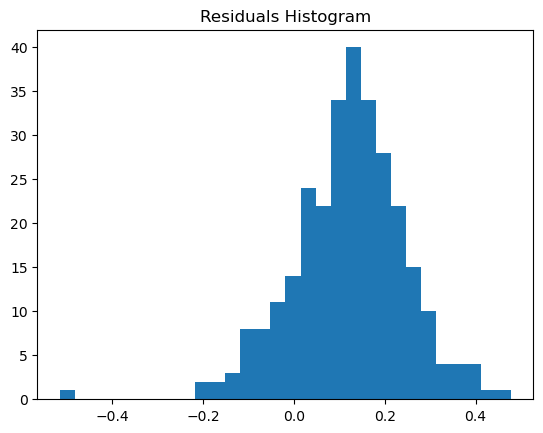

In [33]:
# Residuals plot
residuals = test_logy - test_pred
plt.hist(residuals, bins=30)
plt.title('Residuals Histogram')
plt.show()

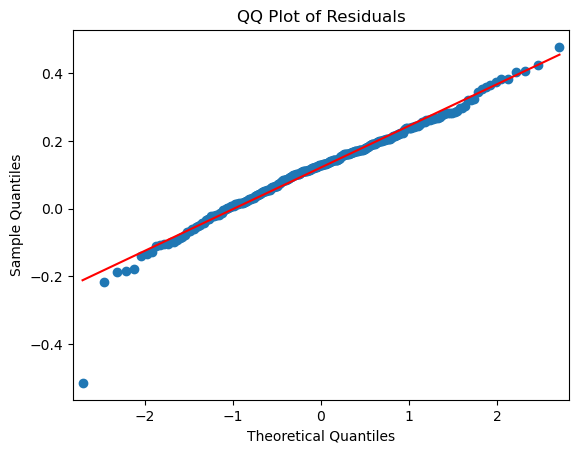

In [34]:
# QQ plot
sm.qqplot(residuals, line='s')
plt.title('QQ Plot of Residuals')
plt.show()

In [35]:
# Predictions on original scale
test_pred_exp = np.exp(test_pred)
test_r2_exp = r2_score(test_y, test_pred_exp)
test_rmse_exp = mean_squared_error(test_y, test_pred_exp, squared=False)
print(f"Original scale - R2: {test_r2_exp:.3f}, RMSE: {test_rmse_exp:.3f}")

Original scale - R2: 0.807, RMSE: 33982.161


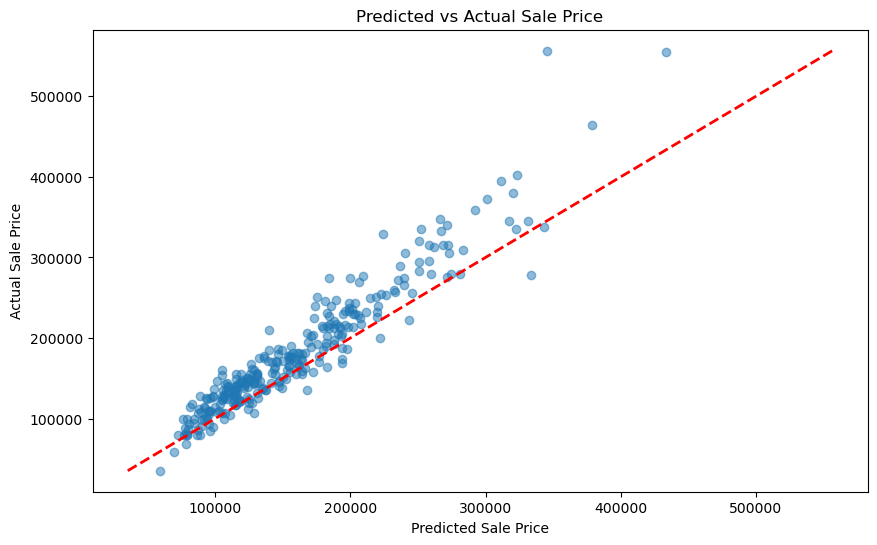

In [36]:
# Scatter plot of predictions vs actual
plt.figure(figsize=(10, 6))
plt.scatter(test_pred_exp, test_y, alpha=0.5)
plt.plot([test_y.min(), test_y.max()], [test_y.min(), test_y.max()], 'r--', lw=2)
plt.xlabel('Predicted Sale Price')
plt.ylabel('Actual Sale Price')
plt.title('Predicted vs Actual Sale Price')
plt.show()

   ### MARS Test

In [55]:
from sklearn.preprocessing import SplineTransformer
from sklearn.pipeline import make_pipeline
# Piecewise linear regression with SplineTransformer and LinearRegression
n_knots = 3
spline_transformer = SplineTransformer(n_knots=n_knots, degree=1, extrapolation='linear')
spline_model = make_pipeline(spline_transformer, LinearRegression())
spline_model.fit(X_train_selected, train_logy)

Pipeline(steps=[('splinetransformer',
                 SplineTransformer(degree=1, extrapolation='linear',
                                   n_knots=3)),
                ('linearregression', LinearRegression())])

In [56]:
# Predictions
train_pred = spline_model.predict(X_train_selected)
test_pred = spline_model.predict(X_test_selected)
train_pred

array([11.626, 12.103, 11.772, ..., 12.173, 12.277, 12.563])

In [57]:
# Evaluation
train_r2 = r2_score(train_logy, train_pred)
train_rmse = mean_squared_error(train_logy, train_pred, squared=False)
f"Training R2: {train_r2:.3f}, RMSE: {train_rmse:.3f}"

'Training R2: 0.894, RMSE: 0.130'

In [58]:
test_r2 = r2_score(test_logy, test_pred)
test_rmse = mean_squared_error(test_logy, test_pred, squared=False)
f"Testing R2: {test_r2:.3f}, RMSE: {test_rmse:.3f}"

'Testing R2: 0.857, RMSE: 0.150'

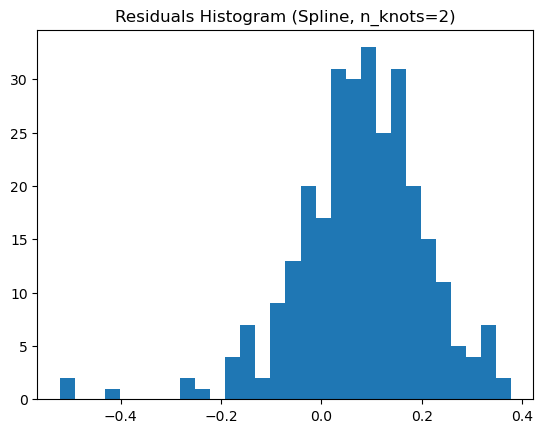

In [59]:
# Residuals plot
residuals = test_logy - test_pred
plt.hist(residuals, bins=30)
plt.title(f'Residuals Histogram (Spline, n_knots=2)')
plt.show()

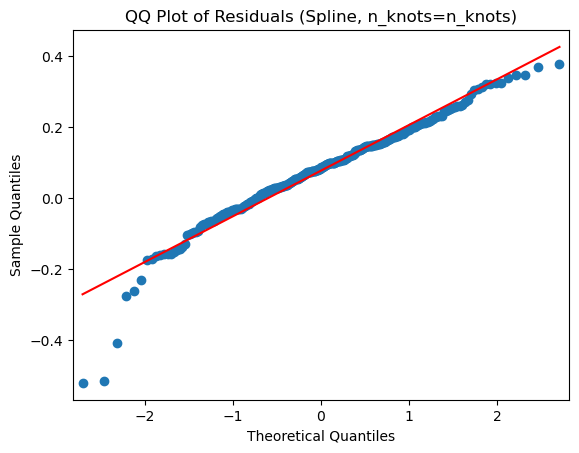

In [60]:
# QQ plot
sm.qqplot(residuals, line='s')
plt.title(f'QQ Plot of Residuals (Spline, n_knots=n_knots)')
plt.show()

In [61]:
# Predictions on original scale
test_pred_exp = np.exp(test_pred)
test_r2_exp = r2_score(test_y, test_pred_exp)
test_rmse_exp = mean_squared_error(test_y, test_pred_exp, squared=False)
print(f"Original scale - R2: {test_r2_exp:.3f}, RMSE: {test_rmse_exp:.3f}")

Original scale - R2: 0.844, RMSE: 30604.521


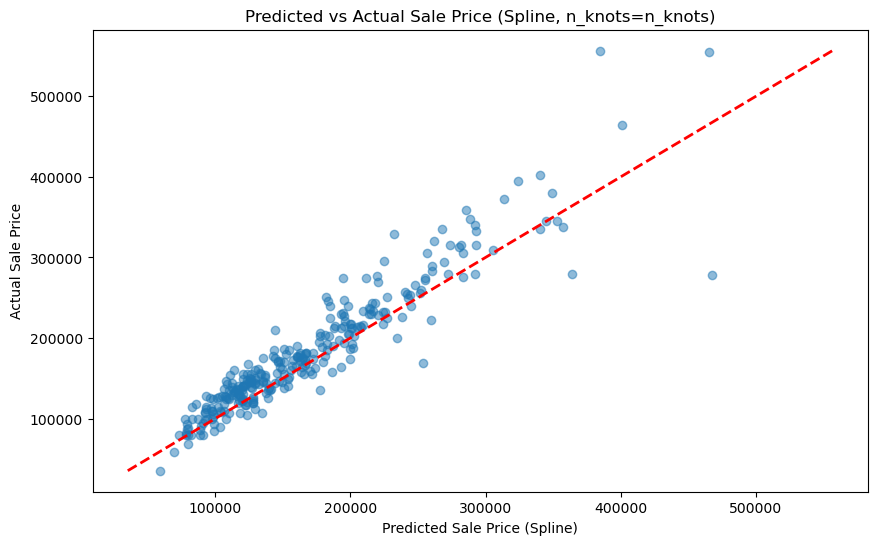

In [63]:
# Scatter plot of predictions vs actual
plt.figure(figsize=(10, 6))
plt.scatter(test_pred_exp, test_y, alpha=0.5)
plt.plot([test_y.min(), test_y.max()], [test_y.min(), test_y.max()], 'r--', lw=2)
plt.xlabel('Predicted Sale Price (Spline)')
plt.ylabel('Actual Sale Price')
plt.title(f'Predicted vs Actual Sale Price (Spline, n_knots=n_knots)')
plt.show()

In [64]:
# Variable importance
# Extract coefficients from the LinearRegression step
lr = spline_model.named_steps['linearregression']
coefs = lr.coef_

# Get feature names after spline transformation
spline_feature_names = spline_transformer.get_feature_names_out(selected_features)

In [65]:
# Map coefficients back to original features
importance_dict = {}
for orig_feature in selected_features:
    # Find all spline terms related to this feature
    related_terms = [i for i, name in enumerate(spline_feature_names) if orig_feature in name]
    if not related_terms:  # For categorical dummies not transformed
        related_terms = [i for i, name in enumerate(spline_feature_names) if name == orig_feature]
    # Sum absolute coefficients for this feature's terms
    importance_dict[orig_feature] = np.sum(np.abs(coefs[related_terms]))

# Convert to DataFrame for plotting
importance_df = pd.DataFrame({
    'Feature': list(importance_dict.keys()),
    'Importance': list(importance_dict.values())
}).sort_values('Importance', ascending=False)

print("Variable Importance:")
print(importance_df)

Variable Importance:
                 Feature       Importance
1            OverallQual 818123563634.061
19     GarageType_Attchd 347005652722.164
9            MSZoning_RL 226931429004.508
0             MSSubClass 212912011817.931
11  Neighborhood_NridgHt 185654757210.073
15      RoofMatl_CompShg 110891116667.953
14       Condition1_Norm 103709571285.910
3              GrLivArea  97772860807.564
16      RoofMatl_WdShngl  90820323068.531
12  Neighborhood_Somerst  77272646815.223
5             Fireplaces  73002366459.611
4           BsmtFullBath  72869752063.922
2            OverallCond  67596061391.652
10  Neighborhood_Crawfor  64477357413.056
13  Neighborhood_StoneBr  49173505789.121
7             GarageArea  30753565155.635
6             GarageCars  25384253594.393
18       BsmtExposure_Gd  18346004740.341
8               yearsOld   1875290090.225
17      Foundation_PConc            0.030


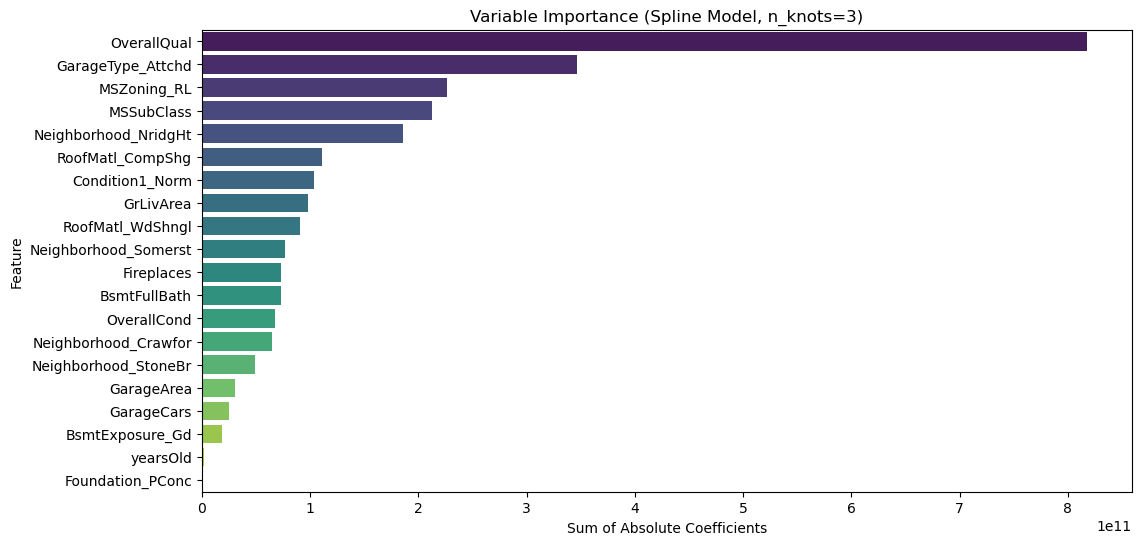

In [66]:
# Plot variable importance
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title(f'Variable Importance (Spline Model, n_knots={n_knots})')
plt.xlabel('Sum of Absolute Coefficients')
plt.ylabel('Feature')
plt.show()

In [67]:
# Identify top numerical feature (exclude categorical dummies for spline knots)
numerical_selected = [f for f in selected_features if f in numerical_cols]
top_feature = importance_df[importance_df['Feature'].isin(numerical_selected)].iloc[0]['Feature']
print(f"Top numerical feature: {top_feature}")

Top numerical feature: OverallQual


In [75]:
# Compute knots manually for the top feature
feature_min = X_train_selected[top_feature].min()
feature_max = X_train_selected[top_feature].max()
interior_knots = np.linspace(feature_min, feature_max, n_knots + 2)[1:-1]  # Exclude boundaries
all_knots = np.concatenate([[feature_min], interior_knots, [feature_max]])  # Include start and end
all_knots

array([ 1.  ,  3.25,  5.5 ,  7.75, 10.  ])

In [76]:
# Create prediction grid for knots only
X_grid = pd.DataFrame(np.tile(X_train_selected.mean(), (len(all_knots), 1)), columns=X_train_selected.columns)
X_grid[top_feature] = all_knots  # Set top feature to knot values
knot_predictions = spline_model.predict(X_grid)
knot_predictions

array([-6.299e+10, -6.299e+10, -6.299e+10, -6.299e+10, -6.299e+10])

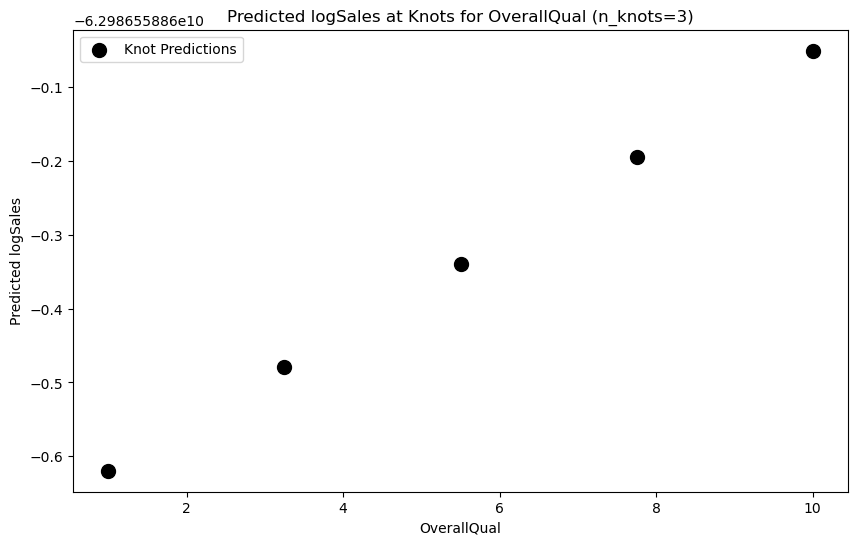

In [77]:
# Simple scatter plot of knot values vs predicted logSales
plt.figure(figsize=(10, 6))
plt.scatter(all_knots, knot_predictions, color='black', s=100, label='Knot Predictions')
plt.xlabel(top_feature)
plt.ylabel('Predicted logSales')
plt.title(f'Predicted logSales at Knots for {top_feature} (n_knots={n_knots})')
plt.legend()
plt.show()